In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'/Users/briangor/Downloads/Weather Data.csv')

In [3]:
df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


<h2> Week 2: EDA Assignment </h2>

<h3>1. Data Overview and Cleaning </h3>

- What are the key characteristics of the dataset? 

In [4]:
df.shape #number of records

(8784, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temp_C,8784.0,8.798144,11.687883,-23.30,0.10,9.30,18.80,33.00
Dew Point Temp_C,8784.0,2.555294,10.883072,-28.50,-5.90,3.30,11.80,24.40
Rel Hum_%,8784.0,67.431694,16.918881,18.00,56.00,68.00,81.00,100.00
Wind Speed_km/h,8784.0,14.945469,8.688696,0.00,9.00,13.00,20.00,83.00
Visibility_km,8784.0,27.664447,12.622688,0.20,24.10,25.00,25.00,48.30
Press_kPa,8784.0,101.051623,0.844005,97.52,100.56,101.07,101.59,103.65


- Identify and handle any missing or null values

In [9]:
df.isna().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

- Check for and address any duplicate records

In [11]:
df.duplicated().sum()

0

<h3> 2. Statistical Summary: </h3>

- Provide a statistical summary of the dataset (mean, median, standard deviation)

In [12]:
df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


- Identify and describe any significant outliers in the data

array([[<AxesSubplot:title={'center':'Temp_C'}>,
        <AxesSubplot:title={'center':'Dew Point Temp_C'}>],
       [<AxesSubplot:title={'center':'Rel Hum_%'}>,
        <AxesSubplot:title={'center':'Wind Speed_km/h'}>],
       [<AxesSubplot:title={'center':'Visibility_km'}>,
        <AxesSubplot:title={'center':'Press_kPa'}>]], dtype=object)

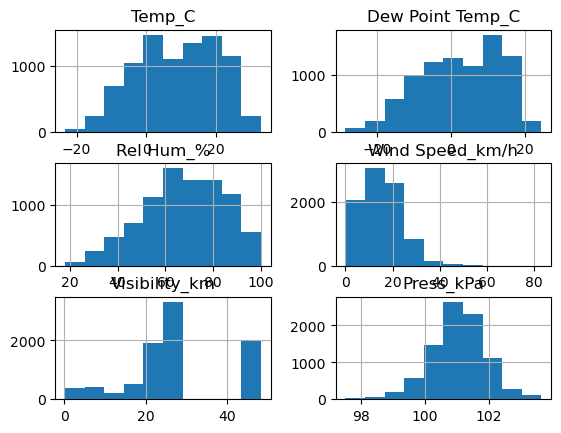

In [16]:
df.hist()

In [14]:
df.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [17]:
# Calculate IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [21]:
#Identifying outliers
outliers = df[(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))]
print(outliers)

     Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0          NaN     NaN               NaN        NaN              NaN   
1          NaN     NaN               NaN        NaN              NaN   
2          NaN     NaN               NaN        NaN              NaN   
3          NaN     NaN               NaN        NaN              NaN   
4          NaN     NaN               NaN        NaN              NaN   
...        ...     ...               ...        ...              ...   
8779       NaN     NaN               NaN        NaN              NaN   
8780       NaN     NaN               NaN        NaN              NaN   
8781       NaN     NaN               NaN        NaN              NaN   
8782       NaN     NaN               NaN        NaN              NaN   
8783       NaN     NaN               NaN        NaN              NaN   

      Visibility_km  Press_kPa Weather  
0               8.0        NaN     NaN  
1               8.0        NaN     NaN  
2           

<h3> 3. Data Visualization </h3>

- Create visualizations to show the distribution of key weather parameters

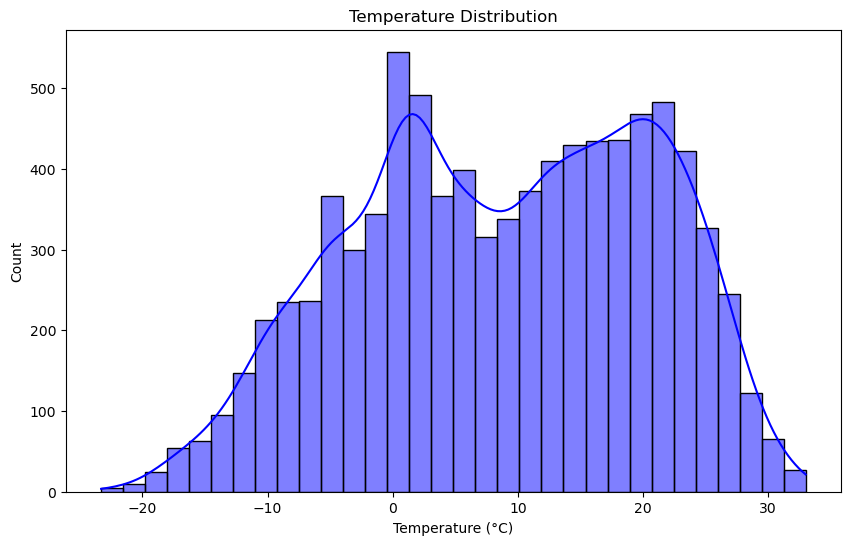

In [22]:
# Temperature Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Temp_C'], kde=True, color='blue')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.show()

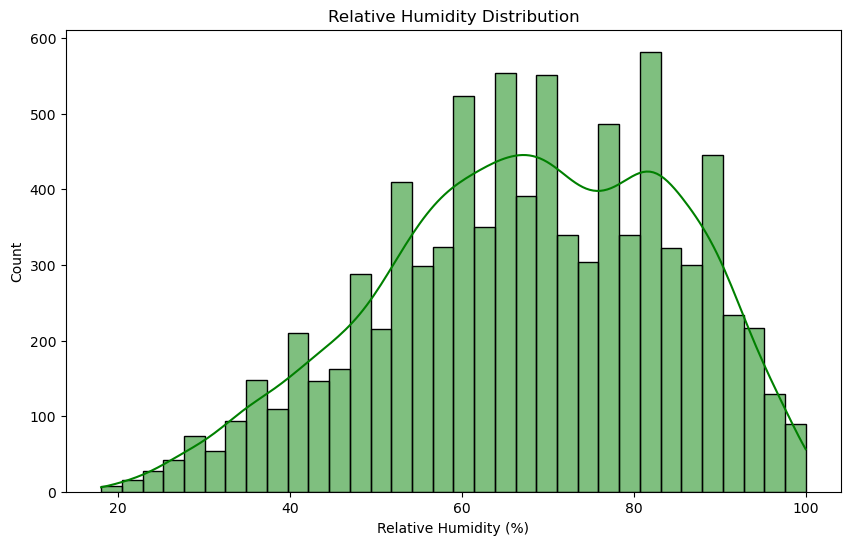

In [23]:
# Humidity Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Rel Hum_%'], kde=True, color='green')
plt.title('Relative Humidity Distribution')
plt.xlabel('Relative Humidity (%)')
plt.show()

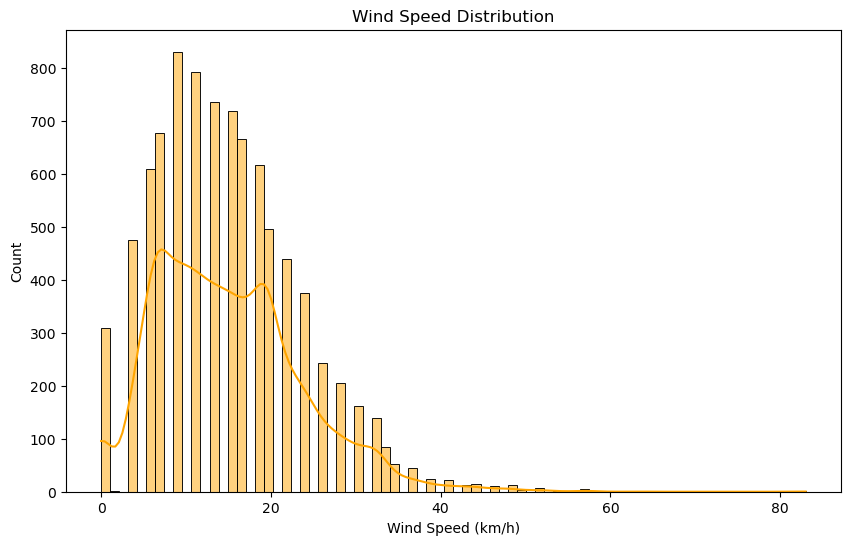

In [24]:
# Wind Speed Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Wind Speed_km/h'], kde=True, color='orange')
plt.title('Wind Speed Distribution')
plt.xlabel('Wind Speed (km/h)')
plt.show()

- Plot time series graphs to visualize trends over time . Highlight any notable patterns or seasonal variations

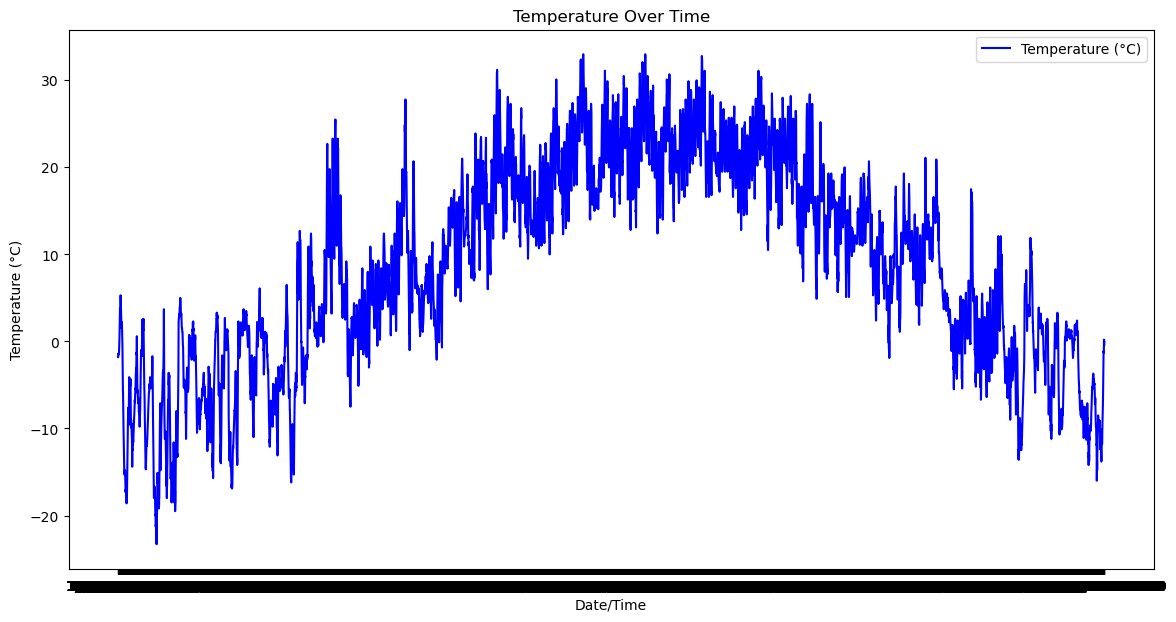

In [25]:
# Time Series Plots
plt.figure(figsize=(14, 7))
plt.plot(df['Date/Time'], df['Temp_C'], label='Temperature (°C)', color='blue')
plt.title('Temperature Over Time')
plt.xlabel('Date/Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

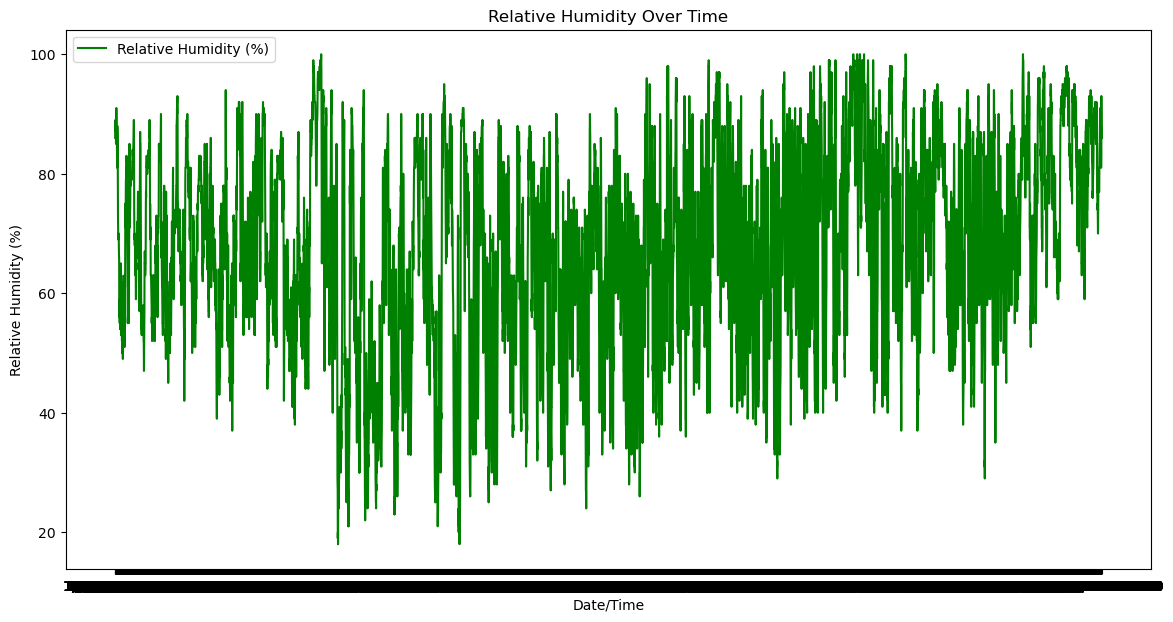

In [26]:
plt.figure(figsize=(14, 7))
plt.plot(df['Date/Time'], df['Rel Hum_%'], label='Relative Humidity (%)', color='green')
plt.title('Relative Humidity Over Time')
plt.xlabel('Date/Time')
plt.ylabel('Relative Humidity (%)')
plt.legend()
plt.show()